<center><h1>Theory and Practice </center></h1>

In this file we will define some details we "forgot" in the LaTeX document. In a second part of this notebook we will see some concepts being practised.

__Expected value__

$$\mathcal E(X) = \sum_{i}x_i\cdot P(X=x_i)$$

This is called __expected value__ and it's a centrality index of my random variable. It's basically a weighted average.
__If we have a discreet random variable this definition is correct, but otherwise if we have a continuous one it's quite different:__

$$\mathcal E(X) = \int_{- \infty}^{+ \infty} x \cdot f_x(x)dx$$



__Variance__

$Var(X) = \mathcal E( (X - \mu)^2 )$

This dispersion index tell us how much we go away from the expected value. The formula can be simplified as follows:

$Var(X) = \mathcal E(X^2) - \mathcal E(X)^2$

__Independence of random variables__

This property is really powerful and allow us to do many things during the probability calculus.

Two random variables are independent if and only if:

$$X,Y \ \ \ are \ \  independent \leftrightarrow$$

$$\forall A,B \subseteq R \ \ \ P(X \in A,Y\in B) = P(X \in A)P(X \in B)$$ 

You can demonstrate that this definition is equivalent to:

$$p_{x,y} = p_x(x)p_y(y)$$

__Inferential statistics parametric__


In this sector we have to define a few actors:

__1. Population:__ it's a random variable.


__2. Sample:__ a succession of random variables extracted from the population. Sampling is a dynamic concept, if I do a poll I expect to get different answers every time, so every sample is a random variable.


__3. Estimator:__ it's a function that take as argument the sample and give as output the esteem.

All of the random variables must be independent from each other and with the same distribution, otherwise It doesn't work anything because of obviously reasons.




__Unbiased estimator__

An estimator of a given parameter is said unbiased if it's expected value is equal to the true value of the parameter.
More formal:

$$\mathcal E(t(X_1,..,X_n)) = \tau(\theta)$$

t is the estimator, $\tau$ is the quantity I would like to esteem and $\theta$ is the uknown parameter.

This property is desirable because the expected value as said in before it's a centrality index, so if I obtain the exact value I want to esteem, I know I'm not commiting what is called as systematic errors.

$\bar x$ is always unbiased for the expected value of the population.

__Consistency in mean square__

To define this second property of an estimator we need to define a couple of tools.

__MSE(Mean Square Error)__

$$MSE_{\tau(\theta)}(T) = \mathcal E((T- \tau(\theta))^2)$$

You can demonstrate that this quantity can be write also as:

$$MSE_{\tau(\theta)}(T) = Var(T) + ( \mathcal E(T) - \tau(\theta))^2$$

__Bias__

It's just the error but it's not quadratic. It's defined as follows:

$$b_{\tau(\theta)}(T) = \mathcal E(T) - \tau(\theta)$$

So we can define the __MSE__ as:

$$MSE_{\tau(\theta)}(T) = Var(T) + b_{\tau(\theta)}(T)^2$$

The consistency in mean square is finally defined as the limit above:

$$\lim_{n \rightarrow + \infty} MSE_{\tau(\theta)}(T_n) = 0$$

There's also a weak definition of consistency that you can find as:

$$\lim_{n \rightarrow + \infty} P(\tau(\theta) - \epsilon \leq T_n \leq \tau(\theta) + \epsilon) = 1$$

You can demonstrate that if an estimator is consistent in mean square, then it's also weak consistent.(it doesn't happen the opposite).

### __End of theory(maybe)__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
#import of all packages I will use for this notebook
plt.style.use('fivethirtyeight')

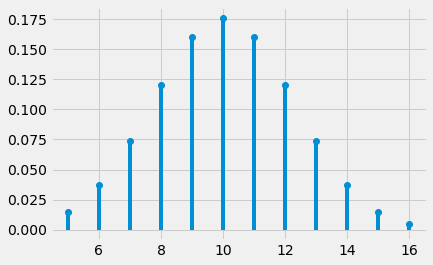

In [2]:
#binomial probability mass function graph
X = st.binom(20,0.5)
y = np.arange(X.ppf(0.01),X.ppf(0.999))
plt.vlines(y,0,X.pmf(y))
plt.plot(y,X.pmf(y),'o')
plt.show()

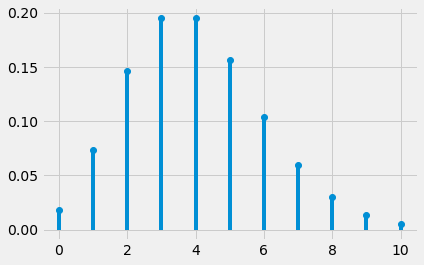

In [3]:
#probability mass function graph of a poission variable
#it's similar to binomial and you can know why by reading
#the LaTeX document in this repository.
X = st.poisson(4)
y = np.arange(X.ppf(0.01),X.ppf(0.999))
x = X.pmf(y)
plt.vlines(y,0,x)
plt.plot(y,x,'o')
plt.show()

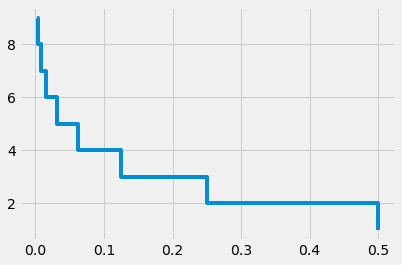

In [4]:
#Probability mass function graph of a geometric variable
#step graph because we are talking about a discreet variable
X = st.geom(0.5)
y = np.arange(X.ppf(0.01),X.ppf(0.999))
x = X.pmf(y)
plt.step(x,y)
plt.show()

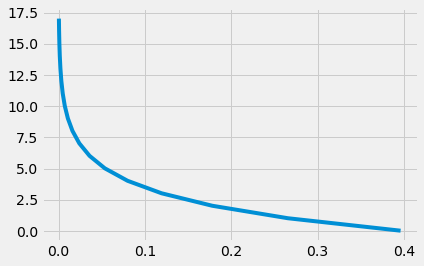

In [5]:
#probability density function graph of an 
#exponential variable. It's similar to the 
#geometric one and you can know why by reading 
#the LaTeX document
X = st.expon(scale= 1/0.4)
y = np.arange(X.ppf(0.01),X.ppf(0.999))
x = X.pdf(y)
plt.plot(x,y)
plt.show()

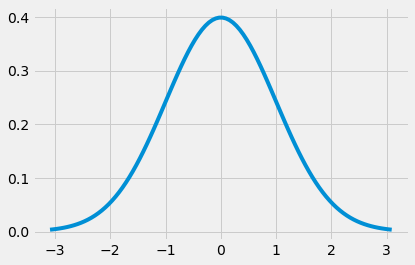

In [6]:
#probability density function of a standard normal variable
X = st.norm()
x = np.linspace(X.ppf(0.001),X.ppf(0.999),100)
y = X.pdf(x)
plt.plot(x,y)
plt.show()

__working with data__

In [7]:
data = pd.read_csv('rilevazioni.csv',sep=';')
data.head()

,temperatura,blocchidanneggiati,raffreddamento
0,46.024489,0.0,1.0
1,83.225486,0.0,1.0
2,81.451565,0.0,NaN
3,54.427135,0.0,1.0
4,76.438674,0.0,1.0


### Bar plot

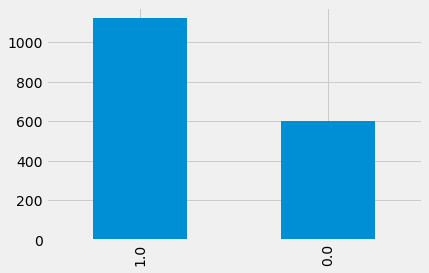

In [8]:
#barplot
#this graph is used to count the absolute/relative 
#frequencies of attributes of my dataset
data['raffreddamento'].value_counts().plot.bar()
plt.show()

### Histogram

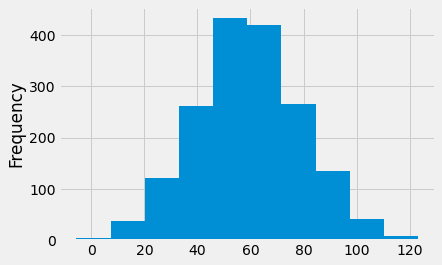

In [9]:
#histogram
#this graph has a purpose similar to barplot but
#it's useful and mandatory for real numbers
#Every bar is a range of numbers.
data['temperatura'].plot.hist()
plt.show()

### Box plot

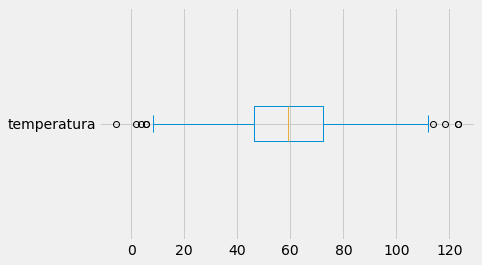

In [10]:
#boxplot
#this graph is usegul to represent the sample in a couple
#of lines. The little black circles displayed are 
#considered as outlier, so this graph is useful also to 
#find these.
#You can see  well the interquartile range.

data['temperatura'].plot.box(vert=False)
plt.show()

### QQ plot

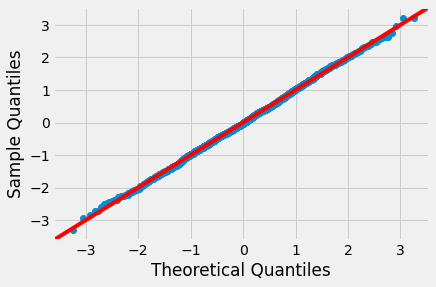

In [11]:
#qqplot
#this graph is used to validate or not the hypothesis that
#two sample have the same distribution or to do the same 
#thing with one sample and verify if it has a certain
#distribution. Here we will verify if it has the normal.

sm.qqplot(data['temperatura'],fit=True,line='45')
plt.show()

As we can see almost every point is over the $y=x$ so we can validate the hypothesis that 'temperatura' has the normal distribution.
__But How it really works?__

We extract the quantiles from the sample(__standardized__) and compared with the standard normal quantiles and if they are near each other they will be almost exactly over the $y = x$

We can define a quantile as:

A quantile of level $q \in [0,1]$ of random variable X is the specification $X_q \in R: P(X\leq x)$

$q = F_x(xq) \longrightarrow F_x^{-1}(q) = xq$

And from this last definition you can know why I used the .ppf function to define the range to build the graphs. .ppf is exactly the reverse of the cumulative distribution function.

### Scatter plot

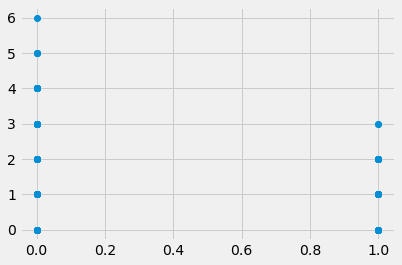

0.00541966234248001

In [13]:
# Scatter plot
# This graph is used to validate or not the hypothesis that two attributes have a relation each other.
# A way to confirm furhter this thing is to calculate the correlation index.
plt.scatter(data['raffreddamento'],data['blocchidanneggiati'])
plt.show()
data['temperatura'].corr(data['blocchidanneggiati'])

__As you can see on the graph, there's no evidence of a relation between the attributes. The correlation index near to zero confirm this. If the index is near to 1, there's a direct relation, if it's near to -1 there's a reverse relation.__

In [14]:
#I read another dataset
data = pd.read_csv('precipitazioni.csv',sep=';')
data.head()

,giorno,anno,zona,temp-minima,temp-massima,umidita,pioggia
0,264,2013,Bordo lago,0.551729,13.698082,22.0,6.314880
1,268,2010,Ponte nuovo,0.308224,22.342138,11.0,0.298525
2,112,2010,Bordo lago,23.447057,35.935247,41.0,5.225831
3,203,2017,Ponte nuovo,18.211744,56.141334,32.0,4.251594
4,124,2014,Centro storico,23.588883,36.973882,39.0,3.783215


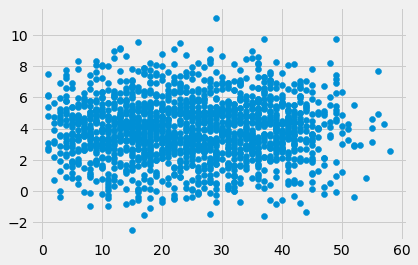

0.010106592784265862

In [15]:
#Another scatter plot to make it more understandable
plt.scatter(data['umidita'],data['pioggia'])
plt.show()
data['umidita'].corr(data['pioggia'])

__Again, no relation between the attributes.__

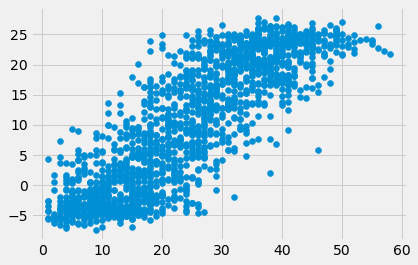

0.8351257174029486

In [16]:
plt.scatter(data['umidita'],data['temp-minima'])
plt.show()
data['umidita'].corr(data['temp-minima'])

__In this case we have instead a direct relation as we can see from the graph and from the index. Greater is 'umidita' and greater will be 'temp-minima'__